In [4]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [6]:
# Your existing code to load the dataset
mnist = fetch_openml('mnist_784', version=1, cache=True, as_frame=False)
X = mnist.data
y = mnist.target.astype(np.uint8)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
# Initialize the classifiers
svm_clf = SVC(gamma='auto', random_state=42)
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the SVM classifier
svm_clf.fit(X_train, y_train)

# Train the Random Forest classifier
rf_clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [8]:
# Predictions for both classifiers
svm_predictions = svm_clf.predict(X_test)
rf_predictions = rf_clf.predict(X_test)

# Accuracy calculation
svm_accuracy = accuracy_score(y_test, svm_predictions)
rf_accuracy = accuracy_score(y_test, rf_predictions)

print(f"SVM Accuracy: {svm_accuracy}")
print(f"Random Forest Accuracy: {rf_accuracy}")



SVM Accuracy: 0.11428571428571428
Random Forest Accuracy: 0.9672857142857143


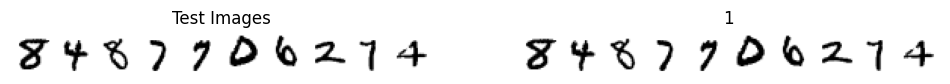

In [8]:
# Function to plot digits and their predictions
def plot_digits(instances, images_per_row=5, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = plt.cm.binary, **options)
    plt.axis("off")

# Select a few test instances
some_digits = X_test[:10]

# Visualizing the results
plt.figure(figsize=(12, 2))
plt.subplot(121); plot_digits(some_digits, images_per_row=10)
plt.title("Test Images")
plt.subplot(122); plot_digits(some_digits, images_per_row=10)
plt.title("SVM Predictions")
for ax, prediction in zip(plt.gcf().axes[1:], svm_predictions[:10]):
    ax.title.set_text(prediction)
plt.show()

# Note: For Random Forest visualizations, you can follow a similar approach. Adjust the title and predictions accordingly.


In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Scaling features
pipeline = make_pipeline(StandardScaler(), SVC())

# Parameter grid for GridSearchCV
param_grid = {
    'svc__C': [0.1, 1, 10, 100], # Example values
    'svc__gamma': [0.001, 0.01, 0.1, 1], # Example values
    'svc__kernel': ['rbf', 'poly', 'sigmoid']
}

# Grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=3, verbose=2)
grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

# Evaluate on the test set
best_model = grid_search.best_estimator_
test_accuracy = best_model.score(X_test, y_test)
print(f"Test set accuracy: {test_accuracy}")


Fitting 3 folds for each of 48 candidates, totalling 144 fits
[CV] END ......svc__C=0.1, svc__gamma=0.001, svc__kernel=rbf; total time= 6.2min
[CV] END ......svc__C=0.1, svc__gamma=0.001, svc__kernel=rbf; total time= 6.4min
[CV] END ......svc__C=0.1, svc__gamma=0.001, svc__kernel=rbf; total time= 6.8min
[CV] END .....svc__C=0.1, svc__gamma=0.001, svc__kernel=poly; total time=16.0min
[CV] END .....svc__C=0.1, svc__gamma=0.001, svc__kernel=poly; total time=16.1min
[CV] END .....svc__C=0.1, svc__gamma=0.001, svc__kernel=poly; total time=16.1min
[CV] END ..svc__C=0.1, svc__gamma=0.001, svc__kernel=sigmoid; total time= 5.2min
[CV] END ..svc__C=0.1, svc__gamma=0.001, svc__kernel=sigmoid; total time= 5.3min
[CV] END ..svc__C=0.1, svc__gamma=0.001, svc__kernel=sigmoid; total time= 5.3min
[CV] END .......svc__C=0.1, svc__gamma=0.01, svc__kernel=rbf; total time=17.3min
[CV] END .......svc__C=0.1, svc__gamma=0.01, svc__kernel=rbf; total time=17.1min
[CV] END .......svc__C=0.1, svc__gamma=0.01, sv

In [10]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier

# Assuming X and y are your features and labels
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the optimized classifiers
optimized_svm_clf = make_pipeline(StandardScaler(), LinearSVC(dual=False, random_state=42))
optimized_rf_clf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

# Train the SVM classifier
optimized_svm_clf.fit(X_train, y_train)
# Make predictions on the test set
svm_predictions = optimized_svm_clf.predict(X_test)

# Train the Random Forest classifier
optimized_rf_clf.fit(X_train, y_train)
# Make predictions on the test set
rf_predictions = optimized_rf_clf.predict(X_test)

# Evaluate the SVM classifier
print("SVM Classifier Performance:")
print(classification_report(y_test, svm_predictions))

# Evaluate the Random Forest classifier
print("Random Forest Classifier Performance:")
print(classification_report(y_test, rf_predictions))



C:\Anaconda\envs\ml\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


SVM Classifier Performance:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1343
           1       0.93      0.98      0.96      1600
           2       0.91      0.89      0.90      1380
           3       0.89      0.88      0.89      1433
           4       0.91      0.93      0.92      1295
           5       0.87      0.87      0.87      1273
           6       0.94      0.95      0.95      1396
           7       0.93      0.94      0.93      1503
           8       0.89      0.83      0.86      1357
           9       0.89      0.88      0.88      1420

    accuracy                           0.91     14000
   macro avg       0.91      0.91      0.91     14000
weighted avg       0.91      0.91      0.91     14000

Random Forest Classifier Performance:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1343
           1       0.98      0.98      0.98      1600
           2

In [14]:
import numpy as np
from sklearn.metrics import mean_squared_error

# Counting RMSE for SVM
svm_rmse = np.sqrt(mean_squared_error(y_test, svm_predictions))
print(f"SVM RMSE: {svm_rmse}")

# Counting RMSE for Random Forest
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_predictions))
print(f"Random Forest RMSE: {rf_rmse}")



SVM RMSE: 1.2297212227632268
Random Forest RMSE: 0.7780929066818252
